<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AI Bootcamp / SECTION 4*

---

# Small Project 1. Techniques for Better Model

## 🏆 학습 목표
- 더 나은 딥러닝 모델을 만들기 위한 기법들에 대해 설명할 수 있습니다.
  - 학습률(Learning Rate)가 무엇인지 설명할 수 있습니다.
  - 가중치 초기화(Weight Initialization)에 대해 설명할 수 있습니다.
  - 과적합을 방지하기 위한 기법들에 대해 설명할 수 있습니다.
    - Drop Out
    - Batch Normalization
    - Early Stopping

## 🛫 Warm up

아래는 인공 신경망(Artificial Neural Network)이 동작하는 과정입니다.
1. 입력층에서 입력된 신호를, 은닉층에서 가중합 연산과 활성화 함수를 거치고, 출력층에서 예측값을 내보내는 과정을 수행합니다.  
이를 **순전파(Forward Propagation)**라고 합니다.
2. 거꾸로 출력층에서 입력층까지 경사하강법을 통해 예측값과 실제값의 차이(손실)를 최소화하는 방향으로 가중치를 업데이트 합니다.  
이를 **역전파(Back Propagation)**라고 합니다.  

이번 시간에는 순전파와 역전파 과정 중에 사용할 수 있는 여러 가지 기법들에 대해 알아보겠습니다.

##1. 가중치 초기화 (Weight Initialization)

인공 신경망이 데이터를 입력받으면 각 노드는 입력값을 어떤 파라미터와 곱하고 이를 모두 더해주는 과정을 거칩니다.  
이 때 이 어떤 파라미터를 **가중치**라고 하고 가중치는 입력값을 각각 얼만큼 반영할지, 즉, 각 입력값의 중요도를 측정하는 역할을 합니다.

<br>이어서 인공 신경망의 역전파 과정에서는 경사하강법을 통해 손실 함수를 최소화하는 방향으로 가중치를 조금씩 변경합니다.  
경사하강법은 경사를 내려갈 지점, 시작할 **임의의 지점**을 정해주어야 하기 때문에 맨 처음 가중치는 랜덤 값으로 설정합니다.  

<br>랜덤한 값이라고 하지만, 초기 가중치를 잘못 설정하면 기울기 소실/폭발과 같은 문제가 발생합니다.  
이러한 모델 훈련에 치명적인 문제를 발생하지 않게 하기 위해 **초기 가중치를 설정하는 기법**들이 발전되어 왔습니다.  
이 기법을 **가중치 초기화(Weight Initialization)**라고 합니다.  

<br>아래에서 은닉층이 5 개, 각 층의 노드가 1000개인 신경망을 통해 가중치에 따른 활성값의 변화를 살펴보겠습니다.

### 활성화 함수로 **Sigmoid**를 취해줄 때


우선 모든 가중치를 0으로 한번 설정해보겠습니다.

입력 데이터들을 0과 가깝게 정규화하기 때문에 이 방법은 꽤 적절해보일 수도 있습니다.  
하지만 모든 가중치가 0이면 모든 활성값이 하나의 값(0.5)이 나오기 때문에 노드를 여러 개 구성하는 의미가 사라집니다.
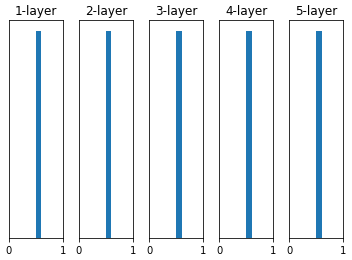

다음은 랜덤값을 설정할 때 가장 흔히 사용되는 정규분포를 사용해보겠습니다.  
표준 편차가 1인 정규분포로 가중치를 초기화를 진행해보겠습니다.  
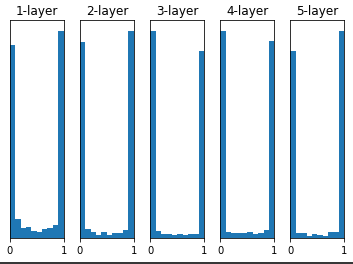  
보시다시피 활성값 대부분이 0또는 1이 되는 것을 볼 수 있습니다.  
활성값이 0또는 1이면 역전파 과정에서 미분값이 0이 되기 때문에 기울기 소실이 일어나게 됩니다.  

<br>표준 편차가 커지면 커질수록 더 많은 활성값이 0또는 1이 될 것입니다.  
표준 편차가 100인 정규분포를 통해 가중치를 초기화해보겠습니다.  
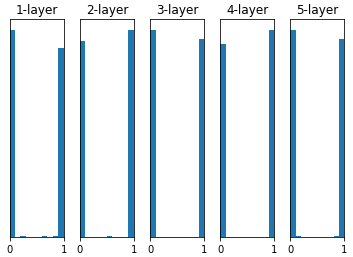  

그렇다면 표준 편차가 작아지면 어떻게 될까요?  
표준편차가 0.001인 정규분포로 가중치 초기화를 진행해보겠습니다.  
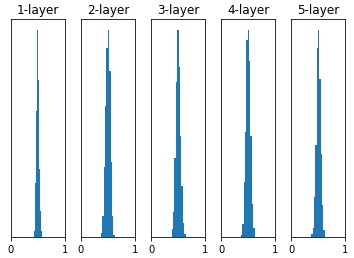  
가중치가 모두 0일 때와 마찬가지로 대부분의 값이 하나가 때문에 이 역시 노드를 여러개 구성하는 의미가 사라집니다.

#### Xavier Initialization

앞서 표준편차에 따라 생기는 문제에 대해 확인해보았습니다.  
Xavier Initialization은 이러한 문제를 해결하기 위해 제시된 기법입니다.  
논문을 발표했던 Xavier Glorot(사비에르 글로로트)의 이름을 따 Xavier 초기화라 부르며 Glorot 초기화라고 부르기도 합니다.

각 층마다 다른 범위의 가중치로 초기화시켜주는 방법으로 표준편차를 **$2\over{\sqrt{n+m}}$**로 하는 정규분포의 값으로 가중치를 초기화합니다.
- n = 이전 은닉층의 노드 개수
- m = 현재 은닉층의 노드 개수  

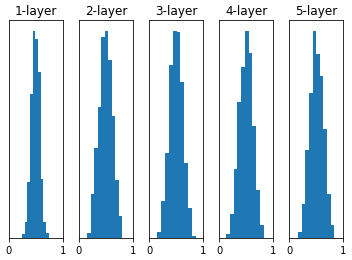  
보시다시피 활성값이 고르게 형태를 띄는 것을 볼 수 있습니다.  
활성값이 한 부분에 치우치지 않기 때문에 이전에 발생했던 문제에서 어느정도 자유로울 수 있습니다.

> ❗ *활성화 함수가 Tanh일 때는 어떻게 될까요?*

### 활성화 함수로 ReLU를 취해줄 때

이번에는 은닉층의 활성화 함수로 ReLU를 취해줄 때 활성값을 확인해보겠습니다.  
먼저 표준 편차가 1인 정규분포로 가중치를 초기화해보겠습니다.  
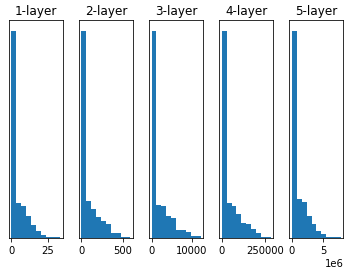   
ReLU는 양수일 때 가중합 연산값을 그대로 받기 때문에 층이 깊어질수록 양수값이 극단적으로 커지는 모습을 볼 수 있습니다.  
층이 깊어질수록 점점 큰 값을 이용해 연산이 진행되기 때문에 학습 과정이 불안정해집니다.  

<br>표준 편차가 커질수록 양수의 활성값은 더욱 극단적으로 커질 것이고,  
표준 편차가 작아질수록 양수의 활성값을 극단적으로 작아져 0에 가까워 질 것입니다.

이번엔 Sigmoid 활성화 함수로 인해 발생한 문제를 해결했던 Xavier 초기화를 사용해보겠습니다.  
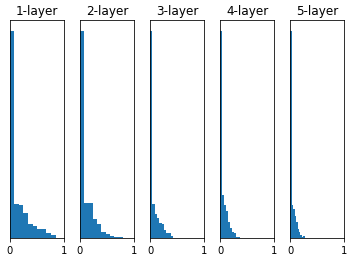  
층이 깊어질수록 모든 활성값이 0에 가까워지고 있습니다.  
활성값이 0이면 역시 기울기 소실 문제가 발생하게 됩니다.  

#### He Initialization

ReLU를 사용할 때에도 초기 가중치에 따른 문제가 발생했습니다.  
He Initialization은 이러한 해결하기 위해 제시된 기법입니다.  
역시 논문을 발표했던 Kaiming He(카이밍 허)의 이름을 따 He 초기화라고 부르며, Kaiming 초기화라고 부르기도 합니다.  

<br>He 초기화도 층마다 다른 분포의 가중치를 가지며 *$\sqrt{2\over{n}}$*를 표준 편차로 하는 정규분포의 값으로 초기화합니다.

- n = 이전 은닉층의 노드 개수  

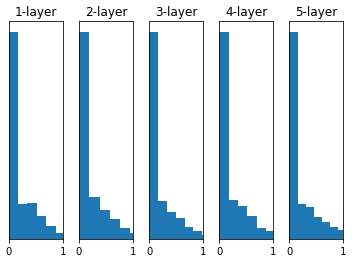   
보시다시피 이전과 다르게 활성값이 0부터 1까지의 범위에 고르게 퍼져있는 것을 볼 수 있습니다.  

### 어떤 가중치 초기화를 사용해야 할까?

초기화 기법들이 제시된 이유에 따라 일반적으로 아래와 같이 사용하는 것을 권장합니다.

- 활성화 함수가 **Sigmoid**일 때는 **Xavier Initialization**,  
- 활성화 함수가 ReLU일 때는 **He Initialization**

하지만 데이터의 특성이나 모델의 구조 등 수많은 이유에 따라 이를 무조건 따르진 않습니다.  

### 코드 예제

앞서 개념 설명을 위해 사용된 시각화 자료를 만들기 위한 코드입니다.  
```Dense``` 층을 추가할때 ```kernel_initializer```을 통해 가중치 초기화 기법을 선택해줄 수 있습니다.  
이 외에도 ```bias_initilizer```를 이용해 편향도 초기화해줄 수 있습니다.  
[Keras 공식 문서](https://keras.io/api/layers/regularizers/)를 참고하여 초기화 방법과 활성화 함수를 바꾸어가며 어떤 활성값을 갖는지 확인해봅시다!

> ❓ ```Dense```*는 어떤* ```kernel_initializer```를 default로 사용할까요?

필요한 라이브러리를 호출합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import Zeros, Ones, RandomNormal, GlorotNormal, HeNormal

mnist 데이터셋을 이용해 해당 신경망을 학습해보겠습니다.

In [ ]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train.shape

(60000, 28, 28)

신경망을 구축하고 활성값을 추출하여 시각화하는 함수입니다.

In [120]:
def example_model_features(weight_init, activation_func):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(1000, kernel_initializer=weight_init, activation=activation_func))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

  extractor = tf.keras.Model(inputs=model.inputs,
                             outputs=[layer.output for layer in model.layers])
  features = extractor(x_train)

  for i in range(1, 5+1):
    plt.subplot(1, 5, i)
    plt.title(f'{i}-layer')
    plt.hist(np.concatenate(features[i].numpy()[0], axis=None))
    plt.xlim([0, 1])
    plt.gca().axes.yaxis.set_visible(False)

  plt.subplots_adjust(wspace = .3)
  plt.show()

##2. 학습률 (Learning Rate)

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255., x_test/255.

x_train.shape

170508288/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [ ]:
model_no_reg = Sequential()
model_no_reg.add(Flatten(input_shape=(32, 32, 3)))
model_no_reg.add(Dense(128, activation='relu'))
model_no_reg.add(Dense(128, activation='relu'))
model_no_reg.add(Dense(64, activation='relu'))
model_no_reg.add(Dense(64, activation='relu'))
model_no_reg.add(Dense(10, activation='softmax'))

model_no_reg.compile(optimizer='adam', 
                     loss='sparse_categorical_crossentropy',
                     metrics = ['accuracy'])

model_no_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 422,922
Trainable params: 422,922
Non-trai

In [ ]:
no_reg = model_no_reg.fit(x_train, y_train, validation_split = .1, epochs = 100, verbose = 2)

Epoch 1/100
1407/1407 - 6s - loss: 1.8971 - accuracy: 0.3040 - val_loss: 1.8320 - val_accuracy: 0.3396 - 6s/epoch - 4ms/step
Epoch 2/100
1407/1407 - 6s - loss: 1.7187 - accuracy: 0.3773 - val_loss: 1.6934 - val_accuracy: 0.3774 - 6s/epoch - 4ms/step
Epoch 3/100
1407/1407 - 5s - loss: 1.6467 - accuracy: 0.4075 - val_loss: 1.6188 - val_accuracy: 0.4232 - 5s/epoch - 4ms/step
Epoch 4/100
1407/1407 - 4s - loss: 1.5970 - accuracy: 0.4258 - val_loss: 1.5909 - val_accuracy: 0.4292 - 4s/epoch - 3ms/step
Epoch 5/100
1407/1407 - 4s - loss: 1.5550 - accuracy: 0.4396 - val_loss: 1.5809 - val_accuracy: 0.4278 - 4s/epoch - 3ms/step
Epoch 6/100
1407/1407 - 4s - loss: 1.5270 - accuracy: 0.4521 - val_loss: 1.5735 - val_accuracy: 0.4326 - 4s/epoch - 3ms/step
Epoch 7/100
1407/1407 - 4s - loss: 1.4996 - accuracy: 0.4626 - val_loss: 1.5450 - val_accuracy: 0.4492 - 4s/epoch - 3ms/step
Epoch 8/100
1407/1407 - 4s - loss: 1.4752 - accuracy: 0.4697 - val_loss: 1.5081 - val_accuracy: 0.4614 - 4s/epoch - 3ms/step


In [ ]:
model_reg = Sequential()
model_reg.add(Flatten(input_shape=(32, 32, 3)))
model_reg.add(Dense(128, kernel_regularizer=tf.keras.regularizers.L1(0.0001), activation='relu'))
model_reg.add(Dense(128, kernel_regularizer=tf.keras.regularizers.L2(0.0001), activation='relu'))
model_reg.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L1(0.0001), activation='relu'))
model_reg.add(Dense(64, kernel_regularizer=tf.keras.regularizers.L2(0.0001), activation='relu'))
model_reg.add(Dense(10, activation='softmax'))

model_reg.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               393344    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 422,922
Trainable params: 422,922
Non-tr

In [ ]:
reg = model_reg.fit(x_train, y_train, validation_split=.1, epochs=100, verbose=2)

Epoch 1/100
1407/1407 - 6s - loss: 2.1579 - accuracy: 0.2925 - val_loss: 1.9359 - val_accuracy: 0.3532 - 6s/epoch - 4ms/step
Epoch 2/100
1407/1407 - 4s - loss: 1.9044 - accuracy: 0.3581 - val_loss: 1.8716 - val_accuracy: 0.3720 - 4s/epoch - 3ms/step
Epoch 3/100
1407/1407 - 4s - loss: 1.8410 - accuracy: 0.3816 - val_loss: 1.8696 - val_accuracy: 0.3690 - 4s/epoch - 3ms/step
Epoch 4/100
1407/1407 - 4s - loss: 1.8032 - accuracy: 0.3968 - val_loss: 1.8030 - val_accuracy: 0.3946 - 4s/epoch - 3ms/step
Epoch 5/100
1407/1407 - 5s - loss: 1.7776 - accuracy: 0.4076 - val_loss: 1.8082 - val_accuracy: 0.3950 - 5s/epoch - 4ms/step
Epoch 6/100
1407/1407 - 5s - loss: 1.7627 - accuracy: 0.4100 - val_loss: 1.8135 - val_accuracy: 0.4006 - 5s/epoch - 3ms/step
Epoch 7/100
1407/1407 - 5s - loss: 1.7327 - accuracy: 0.4227 - val_loss: 1.7173 - val_accuracy: 0.4350 - 5s/epoch - 3ms/step
Epoch 8/100
1407/1407 - 4s - loss: 1.7253 - accuracy: 0.4254 - val_loss: 1.7956 - val_accuracy: 0.3944 - 4s/epoch - 3ms/step


In [ ]:
def visualization(model_1, model_2, title, monitoring_1, monitoring_2):
  plt.figure(figsize=(15, 10))

  plt.subplot(221)
  plt.plot(model_1.history[monitoring_1])
  plt.plot(model_1.history[f'val_{monitoring_1}'])
  plt.title(f'No {title} - {monitoring_1}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_1)
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.subplot(223)
  plt.plot(model_2.history[monitoring_1])
  plt.plot(model_2.history[f'val_{monitoring_1}'])
  plt.title(f'{title} - {monitoring_1}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_1)
  plt.legend(['Train', 'Validation'], loc='upper left')
  
  plt.subplot(222)
  plt.plot(model_1.history[monitoring_2])
  plt.plot(model_1.history[f'val_{monitoring_2}'])
  plt.title(f'No {title} - {monitoring_2}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_2)
  plt.legend(['Train', 'Validation'], loc='lower right')

  plt.subplot(224)
  plt.plot(model_2.history[monitoring_2])
  plt.plot(model_2.history[f'val_{monitoring_2}'])
  plt.title(f'{title} - {monitoring_2}')
  plt.xlabel('epoch')
  plt.ylabel(monitoring_2)
  plt.legend(['Train', 'Validation'], loc='lower right')
  
  plt.subplots_adjust(wspace = .15, hspace = .3)
  plt.show()

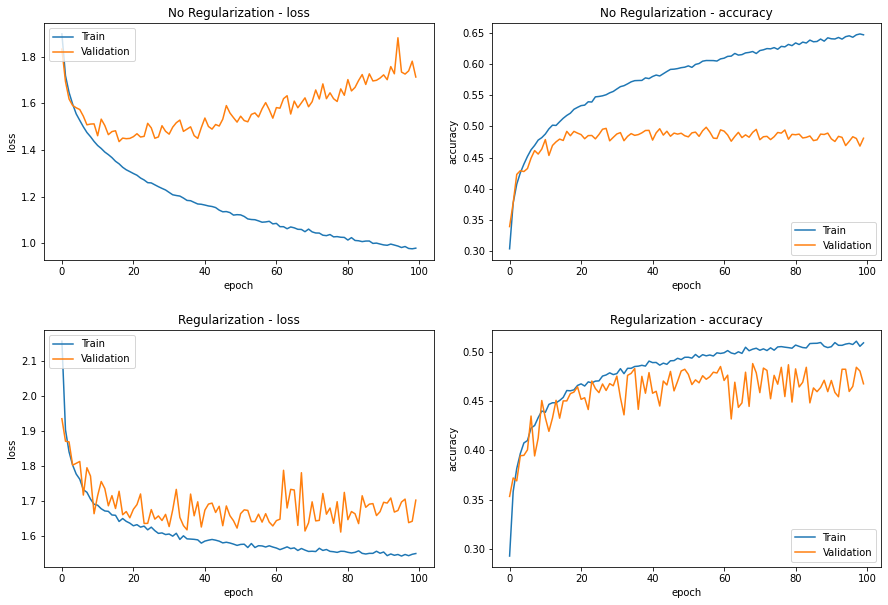

In [ ]:
visualization(no_reg, reg, 'Regularization', 'loss', 'accuracy')

## Reference  

---